In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

from matplotlib.ticker import PercentFormatter

myFmt1 = PercentFormatter(xmax=1, decimals=0, symbol= ' %')
myFmt100 = PercentFormatter(xmax=100, decimals=0, symbol= ' %')

In [2]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head(12)

df.tail()

,CO2
Kuukausi,
2019-04-01,413.32
2019-05-01,414.66
2019-06-01,413.92
2019-07-01,411.77
2019-08-01,409.95


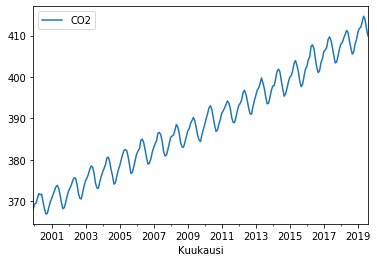

In [3]:
df.plot.line()

data = df

In [4]:
malli = ExponentialSmoothing(data['CO2'], seasonal_periods=12, 
                            trend='add', seasonal='mul').fit()

C:\Users\roope\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


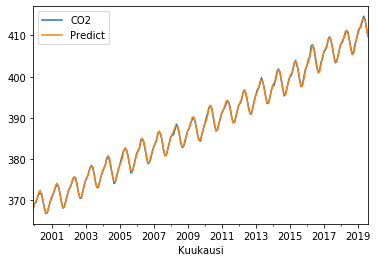

In [5]:
data['Predict'] = malli.fittedvalues

data.plot()

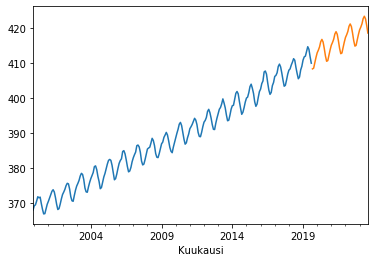

In [6]:
index = pd.date_range('2019-09-01', periods=48, freq='MS')

datap = pd.DataFrame(malli.forecast(48), index=index)

datap.columns = ['Predict']

data['CO2'].plot()

datap['Predict'].plot()